In [16]:
from IPython.display import Image, display
import mediapipe as mp
import cv2

In [17]:
def img_show(image, width=400):
    _, buffer = cv2.imencode('.jpg', image)
    display(Image(data=buffer, width=width))

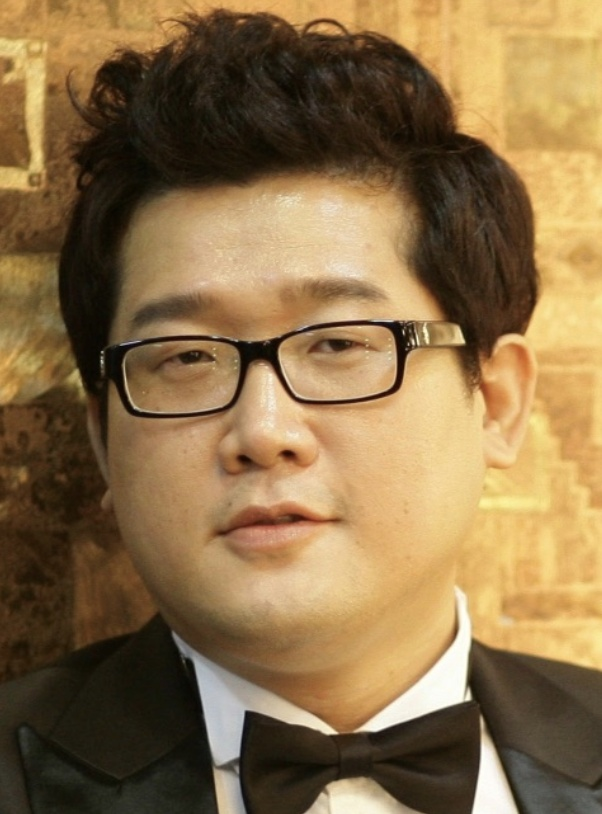

In [18]:
img = cv2.imread('../data/pinkwink.png')
img_show(img, width=200)

In [19]:
face_mesh = mp.solutions.face_mesh.FaceMesh(min_detection_confidence=0.5,
                                            min_tracking_confidence=0.5)
drawing_specs = mp.solutions.drawing_utils.DrawingSpec(thickness=1, circle_radius=1)
results = face_mesh.process(img)

I0000 00:00:1732178304.706409   59263 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732178304.711079   59360 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1732178304.716583   59353 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732178304.730356   59350 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [20]:
results.multi_face_landmarks

[landmark {
   x: 0.443250865
   y: 0.625737488
   z: -0.0863876641
 }
 landmark {
   x: 0.427431941
   y: 0.555260897
   z: -0.134835899
 }
 landmark {
   x: 0.438142627
   y: 0.577443719
   z: -0.0759067312
 }
 landmark {
   x: 0.403782725
   y: 0.493788
   z: -0.0885366
 }
 landmark {
   x: 0.42416957
   y: 0.534925878
   z: -0.14101702
 }
 landmark {
   x: 0.423276603
   y: 0.509455502
   z: -0.126975834
 }
 landmark {
   x: 0.4250471
   y: 0.449757516
   z: -0.0475968122
 }
 landmark {
   x: 0.261355728
   y: 0.463500082
   z: 0.0726826
 }
 landmark {
   x: 0.421580285
   y: 0.400258362
   z: -0.0219206661
 }
 landmark {
   x: 0.417844534
   y: 0.374700904
   z: -0.0217261687
 }
 landmark {
   x: 0.411049575
   y: 0.300894409
   z: 0.0226055216
 }
 landmark {
   x: 0.444783777
   y: 0.63533628
   z: -0.0843118504
 }
 landmark {
   x: 0.446696311
   y: 0.642984867
   z: -0.0764652118
 }
 landmark {
   x: 0.448778331
   y: 0.646672964
   z: -0.0658224821
 }
 landmark {
   x: 0.45004

In [21]:
img_copy = img.copy()
img_h, img_w, img_c = img.shape

for face_landmarks in results.multi_face_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        image=img_copy,
        landmark_list=face_landmarks,
        landmark_drawing_spec=drawing_specs)
    
    for idx, lm in enumerate(results.multi_face_landmarks[0].landmark):
        if idx == 1:
            nose_x = lm.x * img_w
            nosw_y = lm.y * img_h

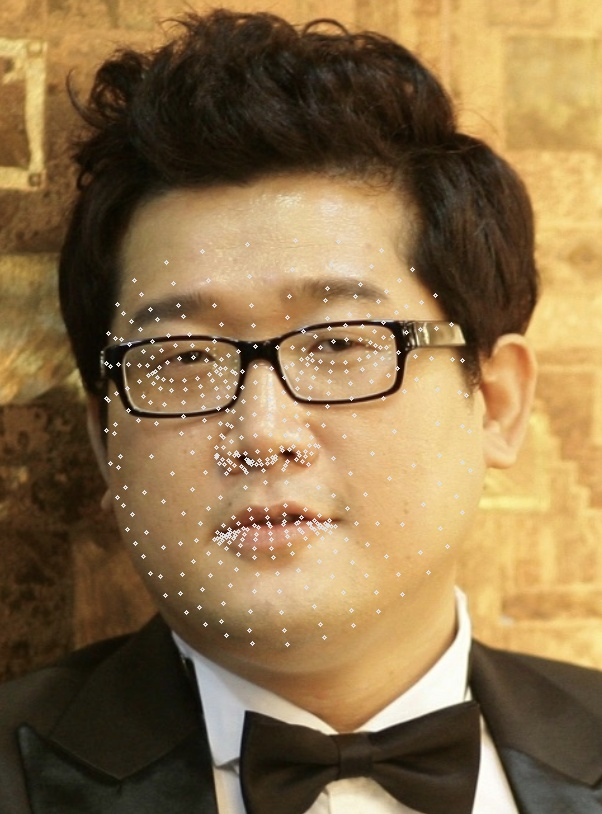

In [22]:
img_show(img_copy, width=300)

In [23]:
def find_nose_position(img):
    img_h, img_w = img.shape[:2]
    results = face_mesh.process(img)
    for face_landmarks in results.multi_face_landmarks:
        for idx, lm in enumerate(face_landmarks.landmark):
            if idx == 1:
                nose_x = lm.x * img_w
                nose_y = lm.y * img_h

                return (int(nose_x), int(nose_y))

In [24]:
x, y = find_nose_position(img_copy)
x, y

(258, 448)

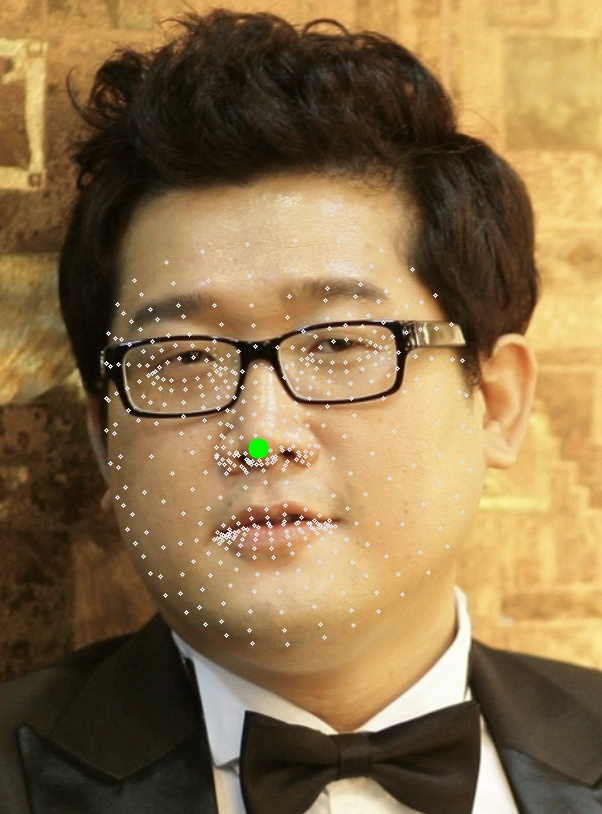

In [25]:
cv2.circle(img_copy, (x, y), 10, (0,255,0), -1)
img_show(img_copy, width=300)

In [26]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mohamedadlyi/aflw2000-3d")

# print("Path to dataset files:", path)

image shape :  (450, 450, 3)


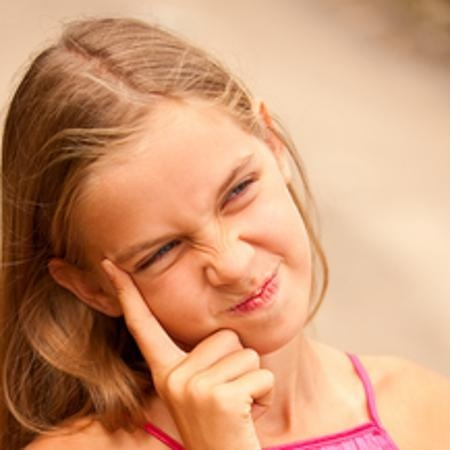

In [27]:
import cv2
img_path_main = "../data/AFLW2000/image00239"
img_path = img_path_main + '.jpg'
img = cv2.imread('../data/AFLW2000/image00239.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shape : ', img.shape)

img_show(img, width=300)

In [28]:
import scipy.io

img_path_main = "../data/AFLW2000/image00239"
mat_path = img_path_main + '.mat'

mat = scipy.io.loadmat(mat_path)
pitch, yaw, roll = mat['Pose_Para'][0][:3]
pitch, yaw, roll

(-0.2625358, -0.3292409, -0.6336514)

In [30]:
nose_x, nose_y = find_nose_position(img)
nose_x, nose_y

(240, 276)

In [31]:
import numpy as np

axes_points = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
], dtype=np.float64)

In [32]:
rotation_matrix = cv2.Rodrigues(np.array([pitch, -yaw, roll]))[0].astype(np.float64)
rotation_matrix

array([[ 0.75710654,  0.53309226,  0.37762719],
       [-0.61543995,  0.77590996,  0.13855477],
       [-0.21914223, -0.33730757,  0.91553277]])

In [33]:
axes_points = rotation_matrix @ axes_points
axes_points

array([[ 0.75710654,  0.53309226,  0.37762719,  0.        ],
       [-0.61543995,  0.77590996,  0.13855477,  0.        ],
       [-0.21914223, -0.33730757,  0.91553277,  0.        ]])

In [34]:
size = 30

axes_points = (axes_points[:2, :] * size).astype(int)
axes_points

array([[ 22,  15,  11,   0],
       [-18,  23,   4,   0]])

In [35]:
axes_points[0, :] = axes_points[0, :] + nose_x
axes_points[1, :] = axes_points[1, :] + nose_y
axes_points

array([[262, 255, 251, 240],
       [258, 299, 280, 276]])

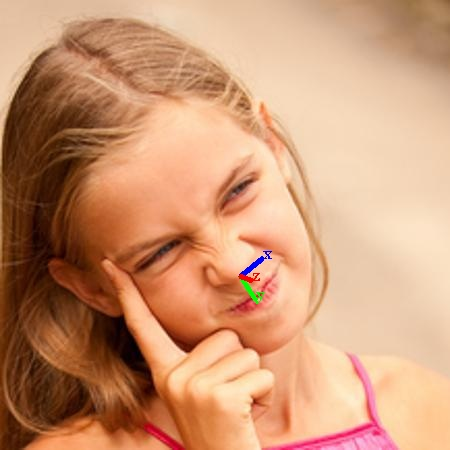

In [36]:
new_img = img.copy()

cv2.line(new_img, tuple(axes_points[:,3].ravel()), tuple(axes_points[:,0].ravel()), (255,0,0), 3)
cv2.putText(new_img, 'x', tuple(axes_points[:, 0].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 0, 0), 1)

cv2.line(new_img, tuple(axes_points[:,3].ravel()), tuple(axes_points[:,1].ravel()), (0, 255, 0), 3)
cv2.putText(new_img, 'y', tuple(axes_points[:, 1].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 255, 0), 1)

cv2.line(new_img, tuple(axes_points[:,3].ravel()), tuple(axes_points[:,2].ravel()), (0,0,255), 3)
cv2.putText(new_img, 'z', tuple(axes_points[:, 2].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 0, 255), 1)

img_show(new_img, width=400)


In [46]:
def draw_axis_lines(img, axes_points, r, g, b):
    cv2.line(img, tuple(axes_points[:,3].ravel()), tuple(axes_points[:,0].ravel()), r, 3)
    cv2.putText(img, 'x', tuple(axes_points[:, 0].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, r, 1)

    cv2.line(img, tuple(axes_points[:,3].ravel()), tuple(axes_points[:,1].ravel()), g, 3)
    cv2.putText(img, 'y', tuple(axes_points[:, 1].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, g, 1)

    cv2.line(img, tuple(axes_points[:,3].ravel()), tuple(axes_points[:,2].ravel()), b, 3)
    cv2.putText(img, 'z', tuple(axes_points[:, 2].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, b, 1)

    return img

In [49]:
def draw_axes(img, pitch, yaw, roll, tx, ty, size=50):
    r = (255, 0, 0)
    g = (0, 255, 0)
    b = (0, 0, 255)

    rotation_matrix = cv2.Rodrigues(np.array([pitch, -yaw, roll]))[0].astype(np.float64)
    temp = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]], dtype=np.float64)

    temp = rotation_matrix @ temp
    temp = (temp[:2, :] * size).astype(int)
    temp[0, :] = temp[0, :] + tx
    temp[1, :] = temp[1, :] + ty

    new_img = img.copy()
    # img_show(new_img, width=300)
    new_img = draw_axis_lines(new_img, temp, r, g, b)
    # img_show(new_img, width=300)

    return new_img

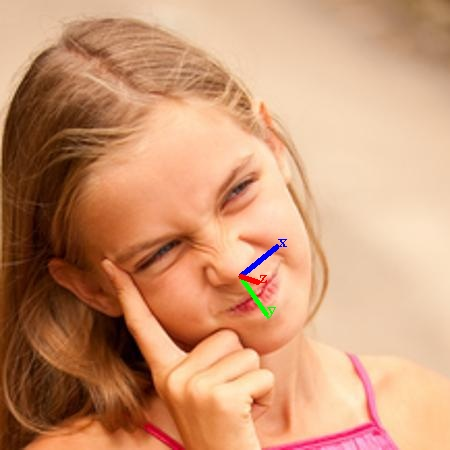

In [50]:
# pitch, yaw, roll = mat['Pose_Para'][0][:3]
# print((pitch, yaw, roll, nose_x, nose_y))
img_copy = draw_axes(img, pitch, yaw, roll, nose_x, nose_y)
img_show(img_copy, width=300)

In [53]:
FOREHEAD, NOSE, MOUTH_LEFT, MOUTH_RIGHT, CHIN, LEFT_EYE, RIGHT_EYE = 1,10,33,61,199,263,291

In [54]:
face_mesh = mp.solutions.face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)

result = face_mesh.process(img)
face_features = []

for face_landmarks in result.multi_face_landmarks:
    for idx, lm in enumerate(face_landmarks.landmark):
        if idx in [FOREHEAD, NOSE, MOUTH_LEFT, MOUTH_RIGHT, CHIN, LEFT_EYE, RIGHT_EYE]:
            face_features.append(lm.x)
            face_features.append(lm.y)

face_features

I0000 00:00:1732178762.944622   59263 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732178762.949552   59915 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1732178762.955492   59908 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732178762.973174   59907 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[0.534928560256958,
 0.6134501695632935,
 0.3553028702735901,
 0.3907785415649414,
 0.3245543837547302,
 0.5903858542442322,
 0.49471497535705566,
 0.6911388635635376,
 0.6210183501243591,
 0.7151702642440796,
 0.5609670281410217,
 0.4003685414791107,
 0.623125433921814,
 0.5887588262557983]

In [55]:
pose_angles = mat['Pose_Para'][0][:3]
face_features.extend(pose_angles)
face_features

[0.534928560256958,
 0.6134501695632935,
 0.3553028702735901,
 0.3907785415649414,
 0.3245543837547302,
 0.5903858542442322,
 0.49471497535705566,
 0.6911388635635376,
 0.6210183501243591,
 0.7151702642440796,
 0.5609670281410217,
 0.4003685414791107,
 0.623125433921814,
 0.5887588262557983,
 -0.2625358,
 -0.3292409,
 -0.6336514]

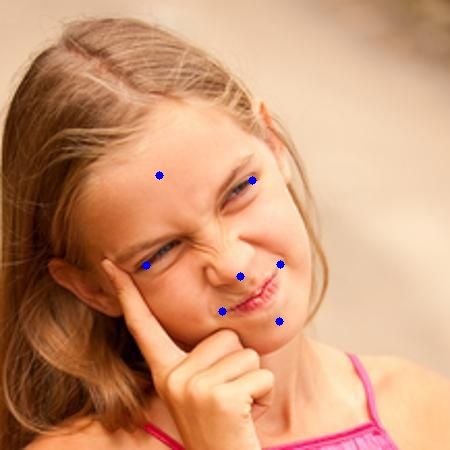

In [58]:
img_copy = img.copy()
img_h, img_w = img.shape[:2]

for i in range(len(face_features)//2):
    cv2.circle(img_copy, center=[int(face_features[i*2]*img_w), int(face_features[i*2+1]*img_h)], radius=4, color=(255,0,0), thickness= -1)

img_show(img_copy, width=300)

In [59]:
def extract_features(img, face_mesh, mat=None):
    result = face_mesh.process(img)
    face_features = []

    if result.multi_fase_landmarks != None:
        for face_landmarks in result.multi_face_landmarks:
            for idx, lm in enumerate(face_landmarks.landmark):
                if idx in [FOREHEAD, NOSE, MOUTH_LEFT, MOUTH_RIGHT, CHIN, LEFT_EYE, RIGHT_EYE]:
                    face_features.append(lm.x)
                    face_features.append(lm.y)
    else :
        face_features.extend([None]*14)
    
    if mat:
        pose_angles = mat['Pose_Para'][0][:3]
        face_features.extend(pose_angles)

    return face_features

In [ ]:
face_mesh = mp.solutions.face_mesh.FaceMesh(min_detection_confidence-0.5, min_tracking_confidence=0.5)